In [8]:
# This cell is handling all the importing of libraries and tools
# imports tensorflow and tf.keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.6.0
Keras Version: 2.6.0


In [9]:
# import NIST data base for hand written digits
# Print the shapes of data as loaded 
# then reshape to the data to flatten from 2 dimension (28,28) to 1 dimension (28*28)
# 
# X_train - array of gray scale image data with shapes containing traning data
# y_train - array of digit labels with shape for training data
# x_test - greyscale image data, test data
# y_test - digit labels, for test data

from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


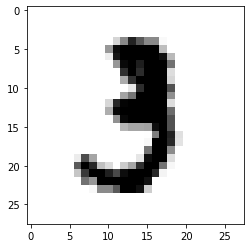

In [10]:
# remapping/reshaping back to 2 dimension and plotting first data point
# to visualize the data point

# changed to observer different digit

plt.imshow(Xtrain[10].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


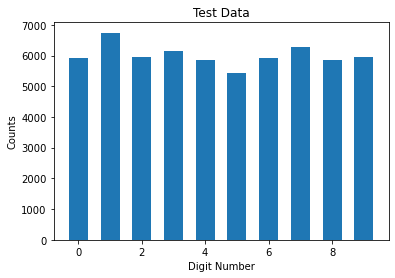

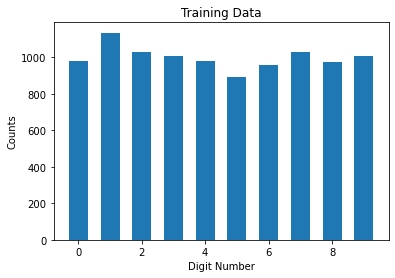

In [11]:
# Get distribution of data labels and plot in bar chart
digit_train, counts_train = np.unique(ytrain, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.title('Test Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# display histogram for test data
digit_test, counts_test = np.unique(ytest, return_counts = True)
distribution_test = dict(zip(digit_test , counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.title('Training Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()


In [12]:
# splitting the training data into train and test subsets
# test size set to 1/12 proportion of the training data set

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/12, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(55000, 784) (5000, 784)
[7 2 2 ... 0 0 4] [7 3 8 ... 7 4 9]


In [13]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)

# Network Design 2
# Network with 5 hidden layers of 100 neurons using sigmoid activation function
# Output layer with softmax activation function
# baseline data split between training and tests is 1/10
# use default batch =10 and epochs = 5


from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [14]:
# training the model using model.fit()

performance = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data =(X_val,y_val))


Epoch 1/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3145 - accuracy: 0.1104 - val_loss: 2.3028 - val_accuracy: 0.1070
Epoch 2/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3025 - val_accuracy: 0.1070
Epoch 3/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3025 - val_accuracy: 0.1070
Epoch 4/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3028 - val_accuracy: 0.1070
Epoch 5/10
550/550 [==============================] - 2s 5ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3026 - val_accuracy: 0.1070
Epoch 6/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3026 - val_accuracy: 0.1070
Epoch 7/10
550/550 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3029 - val_accuracy: 0.1070
Epoch 

In [15]:
# print a summary of our model and each layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (100, 300)                235500    
_________________________________________________________________
dense_1 (Dense)              (100, 300)                90300     
_________________________________________________________________
dense_2 (Dense)              (100, 300)                90300     
_________________________________________________________________
dense_3 (Dense)              (100, 300)                90300     
_________________________________________________________________
dense_4 (Dense)              (100, 300)                90300     
_________________________________________________________________
dense_5 (Dense)              (100, 300)                90300     
_________________________________________________________________
dense_6 (Dense)              (100, 10)                 3

In [16]:
# evaluate model on test data

X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     
# Comments
# The baseline performance of the model is not very good. Accuracy is really low, which is 
# expected from the activation function used is not ideal 

Accuracy: 0.113


In [17]:
# generate confusion matrix and classification report
# report shows scores for precision, recall, F1, and support scores of the model

from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00        

E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# plotting accuracy vs epochs
performance.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

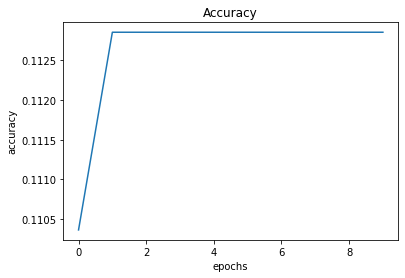

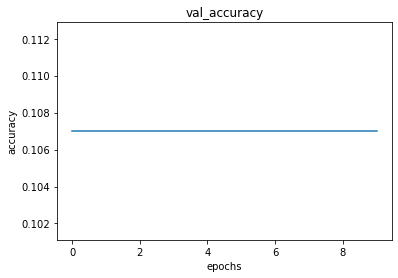

In [19]:
plt.plot(performance.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(performance.history['val_accuracy'])
plt.title('val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Changes made to model were increasing the ratio of training data to test data. Additionally, the number of neurons per layer was increased from 100 to 300 with an additional hidden layer using sigmoid activation function was added. Lastly, The batch size was increased to 100 with number of epochs increased to 10. The observed accuracy performance decreased compared to the baseline performance. Plot of the accuracy vs epochs looks similar to models that have issue with overfitting.